# Bar Graphs

Some Practice with MatPlotLib Bar Graphs using data parsed from the University of Washington [Time Schedule](https://www.washington.edu/students/timeschd/) in my [UW-Course-Planner](https://github.com/AlexEidt/UW-Course-Planner) project.

In [8]:
import json, os, re, itertools
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

current_dir = os.path.normpath(os.getcwd())

### Course Sections per Day

The first Bar Graph shown will use data from the [Autumn Quarter 2019](https://www.washington.edu/students/timeschd/) Time Schedules from the University of Washington to show which days of the week have the most course sections offered.

In [9]:
%matplotlib inline

Text(0, 0.5, 'Number of Sections')

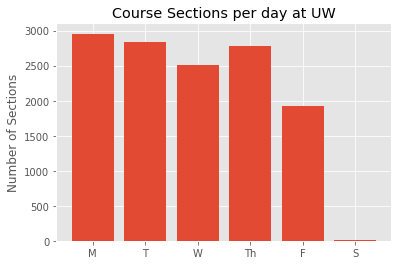

In [12]:
def get_days(offered):
    """Gets the days a course is offered
    @params
        'offered': String representing the days a course is offered
        Example: 'MWF' -> Monday, Wednesday, Friday
    Returns
        Set of abbreviated days the course is offered
    """ 
    result = set()
    for day in ['Th', 'M', 'T', 'W', 'F', 'S']:
        if day in offered:
            result.add(day)
            offered = offered.replace(day, '', 1)
    return result

total_uw = []
for campus in ['Seattle', 'Bothell', 'Tacoma']:
    with open(os.path.normpath(f'{current_dir}/Data/UW_{campus}_AUT2019.json'), mode='r') as file:
        total_uw.append(json.loads(file.read())['Total'])
total_uw = itertools.chain(*total_uw)
# Count number of sections per day
counter = Counter()
for section in total_uw:
    for day in section['Days']:
        counter.update(get_days(day))

days = ['M', 'T', 'W', 'Th', 'F', 'S'] 

# Create Bar Graph
plt.style.use('ggplot')

plt.bar(days, counter.values())

plt.title('Course Sections per day at UW')
plt.ylabel('Number of Sections')

### Course Sections per Building

The second Bar Graph shown will use data from the [Autumn Quarter 2019](https://www.washington.edu/students/timeschd/) Time Schedules from the University of Washington to show which buildings house the most course sections at the University of Washington.

Text(0.5, 0.98, 'Most Commonly used Buildings at UW')

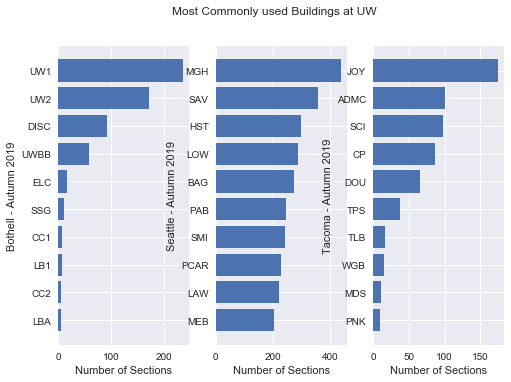

In [14]:
plt.style.use('seaborn')

fig, plots = plt.subplots(nrows=1, ncols=3)

for i, campus in enumerate(['Bothell', 'Seattle', 'Tacoma']):

    # Read Time Schedule Data for each UW Campus
    with open(os.path.normpath(f'{current_dir}/Data/UW_{campus}_AUT2019.json'), mode='r') as file:
        sections = json.loads(file.read())['Total']

    section_counter = Counter()
    # Keep a running total of the number of sections in each building
    for section in sections:
        section_counter.update(section['Building'])

    # Get the top 20 buildings with the number of sections in them
    building, num_sections = map(list, zip(*section_counter.most_common(10)))
    # Reverse both lists
    building = building[::-1]
    num_sections = num_sections[::-1]

    # Plot Data as a Bar Graph
    plots[i].barh(building, num_sections)

    plots[i].set_xlabel('Number of Sections')
    plots[i].set_ylabel(f'{campus} - Autumn 2019')

fig.suptitle('Most Commonly used Buildings at UW')